In [ ]:
# https://keras.io/examples/vision/image_classification_with_vision_transformer/
# https://www.geeksforgeeks.org/image-classification-using-cifar-10-and-cifar-100-dataset-in-tensorflow/
# https://www.geeksforgeeks.org/cifar-10-image-classification-in-tensorflow/

In [1]:
# Add timestamp
import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

Notebook last run (end-to-end): 2023-06-19 07:12:35.734863


In [2]:
# Are we using a GPU?
!nvidia-smi

Mon Jun 19 07:12:37 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
%pwd
%ls '/content'
%cd '/content'

# connect google drive with colab see the following link:
# https://www.marktechpost.com/2019/06/07/how-to-connect-google-colab-with-google-drive/


sample_data/
/content


In [ ]:
!pip install --upgrade pip
!pip install --upgrade tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# Thins function is used to bring the attention of the programmer for the end time execution.

# It's used as decorator as showing below or as following example.

# def square(x):
#     return x**2

# timed_square = timer(square)
# timed_square(5)

from IPython.lib.display import Audio
import numpy as np

def beeper(func):
    def wrapper(*args, **kwargs):
        func_name = func.__name__
        print(f"Starting {func_name}")
        output = func(*args, **kwargs)
        # output = func(*args, **kwargs)
        framerate = 4410
        play_time_seconds = 3

        t = np.linspace(0, play_time_seconds, framerate*play_time_seconds)
        audio_data = np.sin(2*np.pi*300*t) + np.sin(2*np.pi*240*t)


        return Audio(audio_data, rate=framerate, autoplay=True)

    return wrapper

In [4]:
# use toner for non function application API
def toner():
  framerate = 4410
  play_time_seconds = 3
  t = np.linspace(0, play_time_seconds, framerate*play_time_seconds)
  audio_data = np.sin(2*np.pi*300*t) + np.sin(2*np.pi*240*t)

  return Audio(audio_data, rate=framerate, autoplay=True)



In [5]:
# test of the toner for non-fuctional use.
toner()

In [6]:
# Thins function is used to bring the calculate the time execution.

# It's used as decorator as showing below or as following example.

# def square(x):
#     return x**2

# timed_square = timer(square)
# timed_square(5)

import time
def timer(func):
    def wrapper(*args, **kwargs):
        func_name = func.__name__
        print(f"Starting {func_name}")

        start_time = time.time()
        output = func(*args, **kwargs)
        end_time = time.time()
        hours, rem = divmod(end_time-start_time, 3600)
        minutes, seconds = divmod(rem, 60)
        print(f"Total time is:  " "{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))
        return output

    return wrapper

In [7]:
#Disable all debugging logs using os.environ :

import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"


In [8]:
# You can disable all WARNING using
import logging
logging.getLogger("tensorflow").setLevel(logging.WARNING)

In [9]:
!pip install tensorflow-addons==0.16.1
import tensorflow_addons as tfa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.7 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.6.0 and strictly below 2.9.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.12.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


In [10]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa
import matplotlib.pyplot as plt
tf.random.set_seed(40)
# from keras.datasets import fashion_mnist

In [11]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data(label_mode='fine')


print(f"x_train shape: {x_train.shape} - y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape} - y_test shape: {y_test.shape}")

169001437/169001437 [==============================] - 3s 0us/step
x_train shape: (50000, 32, 32, 3) - y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3) - y_test shape: (10000, 1)


Starting wrapper
Starting show_samples


<ipython-input-12-cacf551e42af>:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(3, 4, i+1)
/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


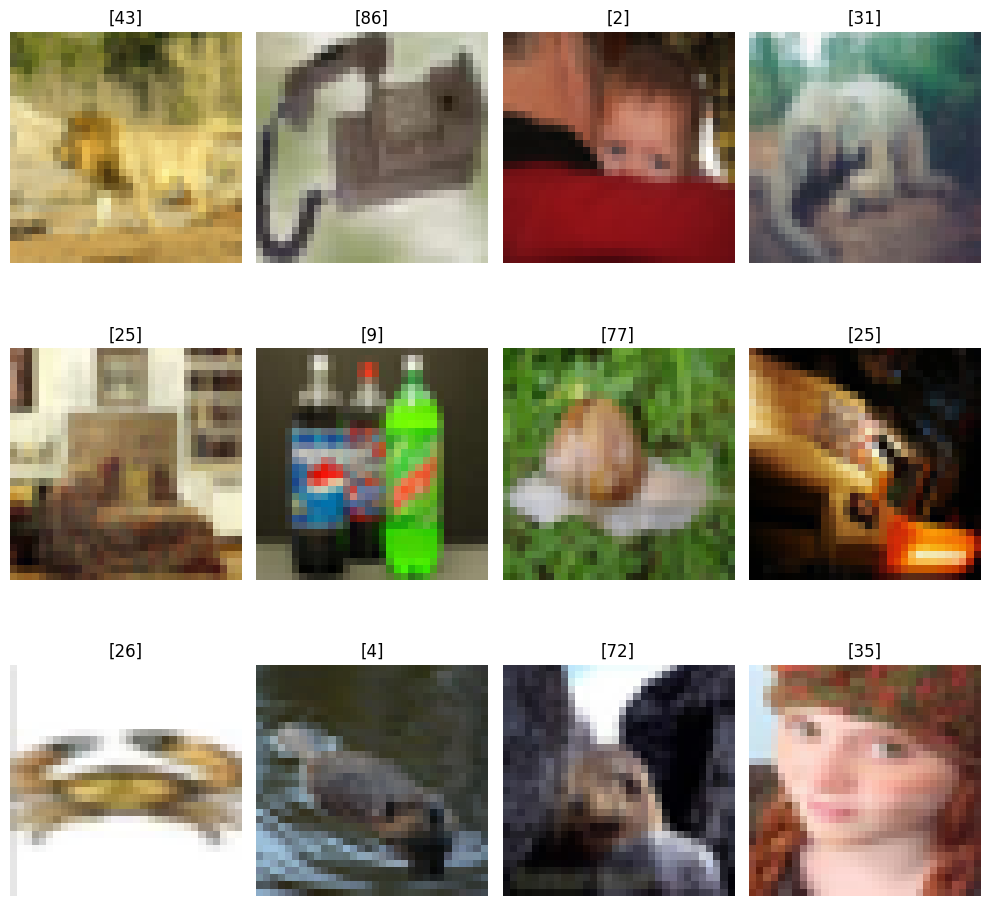

Total time is:  00:00:01.96


In [12]:
@beeper
@timer

def show_samples(data, labels):


  plt.subplots(figsize=(10, 10))
  for i in range(12):
    ax = plt.subplot(3, 4, i+1)
    k = np.random.randint(0, data.shape[0])
    plt.title(labels[k])
    plt.imshow(data[k])
    plt.axis('off')

  plt.tight_layout()
  plt.show();

show_samples(x_train, y_train)

In [13]:
# scale pixels
# could be converted to ('float32') as well
# scale pixels
def prep_pixels(train, test):
# convert from integers to floats

  train_norm = train.astype('float32')
  test_norm  = test.astype('float32')
# normalize to range 0-1
  train_norm = train_norm / 255.0
  test_norm  = test_norm / 255.0
  	# return normalized images
  return train_norm, test_norm

In [14]:
x_train, x_test = prep_pixels(x_train, x_test)

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt


model = Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu',  input_shape=(32, 32, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='softmax'))
# compile model
model.compile(
  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
  optimizer='adam',
  metrics=['AUC', 'accuracy']
  )
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 7200)              0         
                                                                 
 dense (Dense)               (None, 100)               720100    
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
Total params: 731,096
Trainable params: 731,096
Non-trainable params: 0
__________________________________________________

In [16]:
# one hot incoding for the labels.

y_train = tf.one_hot(y_train,
				depth=y_train.max() + 1,
					dtype=tf.float64)

y_test = tf.one_hot(y_test,
				depth=y_test.max() + 1,
				dtype=tf.float64)


y_train = tf.squeeze(y_train)
y_test = tf.squeeze(y_test)


print(y_train.shape, y_test.shape)

(50000, 100) (10000, 100)


In [17]:
# You can use validation split in order to decrease the computational time and GPU
hist = model.fit(x_train, y_train,
                 epochs=10,
								 batch_size=64,
								 validation_split=0.1,
				         verbose=1,
				         validation_data=(x_test, y_test))
toner()


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5561: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


782/782 [==============================] - 15s 6ms/step - loss: 3.9975 - auc: 0.7647 - accuracy: 0.0948 - val_loss: 3.5911 - val_auc: 0.8379 - val_accuracy: 0.1598
Epoch 2/10
782/782 [==============================] - 3s 4ms/step - loss: 3.4225 - auc: 0.8578 - accuracy: 0.1840 - val_loss: 3.3394 - val_auc: 0.8664 - val_accuracy: 0.2031
Epoch 3/10
782/782 [==============================] - 3s 4ms/step - loss: 3.1982 - auc: 0.8800 - accuracy: 0.2247 - val_loss: 3.1989 - val_auc: 0.8776 - val_accuracy: 0.2279
Epoch 4/10
782/782 [==============================] - 4s 5ms/step - loss: 3.0864 - auc: 0.8888 - accuracy: 0.2446 - val_loss: 3.1311 - val_auc: 0.8819 - val_accuracy: 0.2441
Epoch 5/10
782/782 [==============================] - 4s 5ms/step - loss: 3.0080 - auc: 0.8948 - accuracy: 0.2581 - val_loss: 3.1001 - val_auc: 0.8859 - val_accuracy: 0.2470
Epoch 6/10
782/782 [==============================] - 3s 4ms/step - loss: 2.9458 - auc: 0.8997 - accuracy: 0.2675 - val_loss: 3.0511 - val_a

In [18]:
# https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc

def plot_auc_curves(history):

  acc = hist.history['auc']
  val_acc = hist.history['val_accuracy']
  loss = hist.history['loss']
  val_loss = hist.history['val_loss']
  AUC = hist.history['auc']
  val_AUC = hist.history['val_auc']

  epochs = range(len(hist.history['loss']))

  plt.figure()
  plt.plot(epochs, AUC, 'g', label='AUC')
  plt.plot(epochs, val_AUC, 'b', label='Val_AUC')
  plt.xlabel('No.of epochs')
  plt.ylabel('AUC')
  plt.title('Training and validation AUC')
  plt.legend()

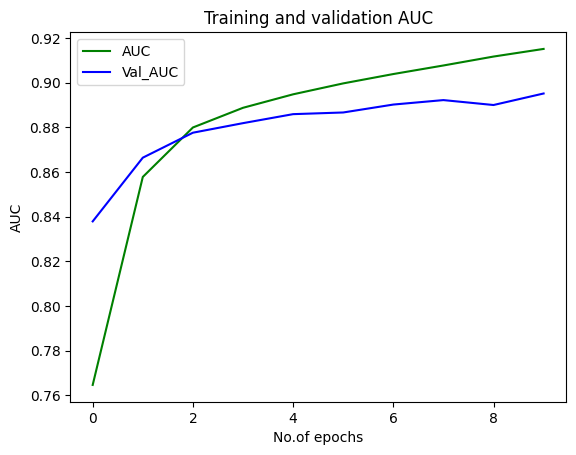

In [19]:
plot_auc_curves(hist)

In [20]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

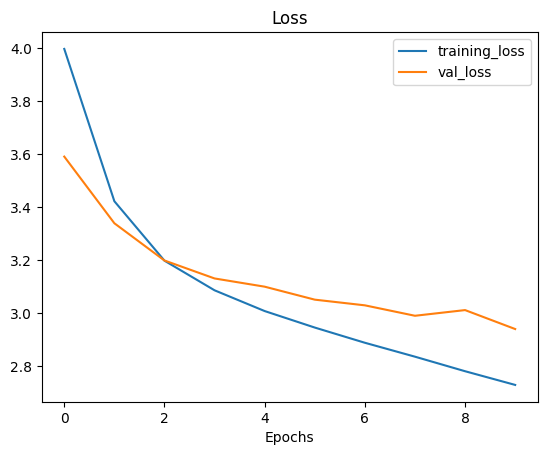

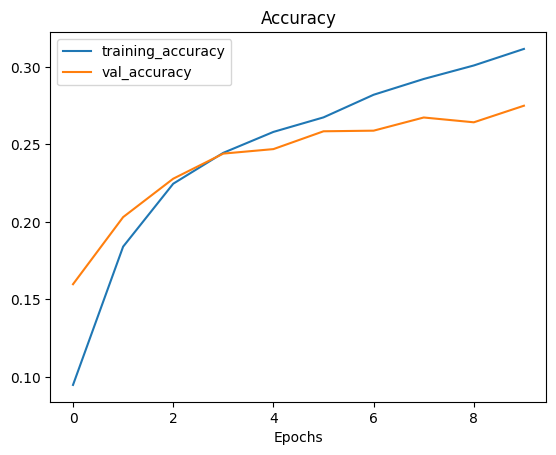

In [21]:
plot_loss_curves(hist)

In [23]:
model_1 = tf.keras.models.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu',
                  input_shape=(32, 32, 3), padding='same'),
    layers.Conv2D(32, (3, 3),
                  activation='relu',
                  padding='same'),
    layers.Conv2D(64, (3, 3),
                  activation='relu',
                  padding='same'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3),
                  activation='relu',
                  padding='same'),


    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(100, activation='softmax')
])

model_1.summary()

model_1.compile(
	loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
	optimizer='adam',
	metrics=['AUC', 'accuracy']
)



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 flatten_2 (Flatten)         (None, 32768)             0         
                                                      

In [24]:
hist1 = model_1.fit(x_train, y_train,
                 epochs=20,
								 batch_size=64,
								#  validation_split=0.1,
				         verbose=1,
				         validation_data=(x_test, y_test))
toner()

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5561: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


782/782 [==============================] - 14s 13ms/step - loss: 3.7274 - auc: 0.8098 - accuracy: 0.1420 - val_loss: 3.3938 - val_auc: 0.8535 - val_accuracy: 0.1901
Epoch 2/20
782/782 [==============================] - 9s 12ms/step - loss: 2.8199 - auc: 0.9077 - accuracy: 0.2933 - val_loss: 2.8617 - val_auc: 0.9011 - val_accuracy: 0.2772
Epoch 3/20
782/782 [==============================] - 10s 13ms/step - loss: 2.3576 - auc: 0.9359 - accuracy: 0.3883 - val_loss: 2.6448 - val_auc: 0.9070 - val_accuracy: 0.3430
Epoch 4/20
782/782 [==============================] - 9s 12ms/step - loss: 2.0378 - auc: 0.9521 - accuracy: 0.4524 - val_loss: 2.3337 - val_auc: 0.9263 - val_accuracy: 0.4026
Epoch 5/20
782/782 [==============================] - 9s 12ms/step - loss: 1.6977 - auc: 0.9665 - accuracy: 0.5316 - val_loss: 2.2500 - val_auc: 0.9293 - val_accuracy: 0.4264
Epoch 6/20
782/782 [==============================] - 9s 12ms/step - loss: 1.3007 - auc: 0.9803 - accuracy: 0.6295 - val_loss: 2.4696 

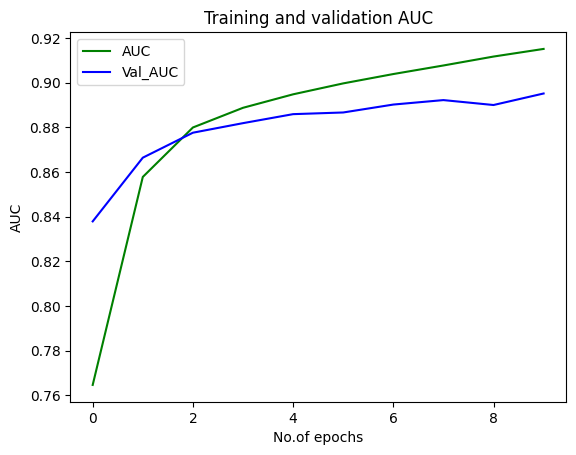

In [25]:
plot_auc_curves(hist1)

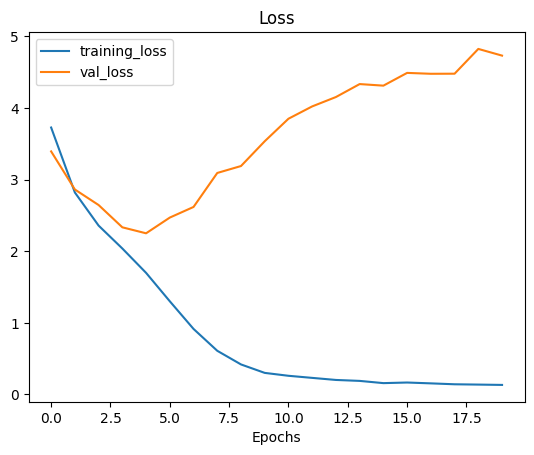

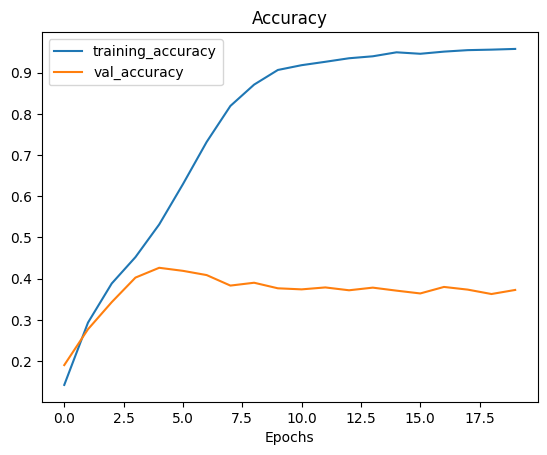

In [26]:
plot_loss_curves(hist1)

## Now implementing a functional model which will use the previous model’s output and learn on top of it.

In [30]:
# build on top of the last layer of ohter model.
temp = model_1.get_layer('conv2d_8')
last_output = temp.output
last_output.shape

TensorShape([None, 16, 16, 128])

In [31]:
x = layers.Flatten()(last_output)

x = layers.Dense(256, activation='relu')(x)
x = layers.BatchNormalization()(x)

x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.BatchNormalization()(x)

output = layers.Dense(10, activation='softmax')(x)

model_new = keras.Model(model_1.input, output)
model_new.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5_input (InputLayer)  [(None, 32, 32, 3)]      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 128)       73856     
                                                             

In [32]:
model_new.compile(
	loss='categorical_crossentropy',
	optimizer='adam',
	metrics=['AUC', 'accuracy']
)

In [33]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

# Distribute it to train and test set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)


170498071/170498071 [==============================] - 5s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [34]:
x_train, x_test = prep_pixels(x_train, x_test)

In [35]:
y_train = tf.one_hot(y_train, depth=10,
					dtype=tf.float64)
y_test = tf.one_hot(y_test, depth=10,
				dtype=tf.float64)

y_train = tf.squeeze(y_train)
y_test = tf.squeeze(y_test)

print(y_train.shape, y_test.shape)

(50000, 10) (10000, 10)


In [36]:
hist2 = model_new.fit(x_train, y_train,
				epochs=20,
				batch_size=64,
        validation_split=0.1,
				verbose=1,
				validation_data=(x_test, y_test))

toner()


Epoch 1/20
782/782 [==============================] - 14s 13ms/step - loss: 0.9621 - auc: 0.9469 - accuracy: 0.6689 - val_loss: 0.8209 - val_auc: 0.9605 - val_accuracy: 0.7138
Epoch 2/20
782/782 [==============================] - 9s 12ms/step - loss: 0.5226 - auc: 0.9833 - accuracy: 0.8185 - val_loss: 0.8873 - val_auc: 0.9562 - val_accuracy: 0.7134
Epoch 3/20
782/782 [==============================] - 9s 12ms/step - loss: 0.2924 - auc: 0.9943 - accuracy: 0.8985 - val_loss: 0.9128 - val_auc: 0.9551 - val_accuracy: 0.7214
Epoch 4/20
782/782 [==============================] - 10s 13ms/step - loss: 0.1703 - auc: 0.9976 - accuracy: 0.9419 - val_loss: 1.0978 - val_auc: 0.9417 - val_accuracy: 0.7143
Epoch 5/20
782/782 [==============================] - 10s 13ms/step - loss: 0.1236 - auc: 0.9986 - accuracy: 0.9560 - val_loss: 1.2004 - val_auc: 0.9376 - val_accuracy: 0.7211
Epoch 6/20
782/782 [==============================] - 9s 12ms/step - loss: 0.0998 - auc: 0.9989 - accuracy: 0.9657 - val_l

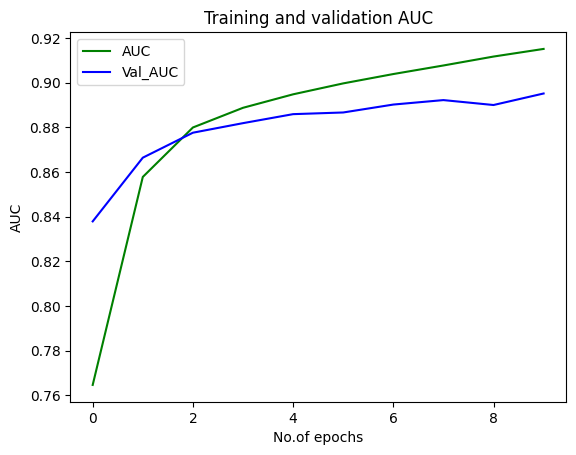

In [37]:
plot_auc_curves(hist2)

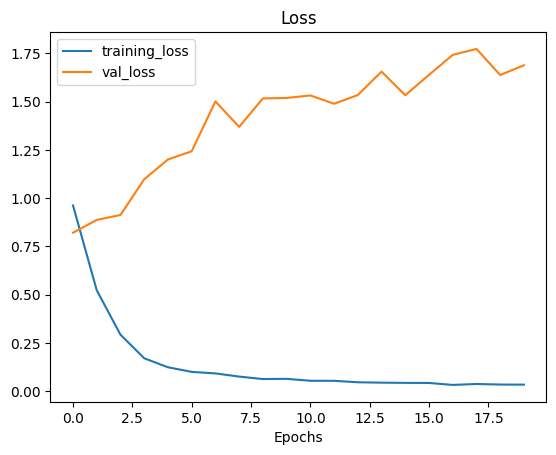

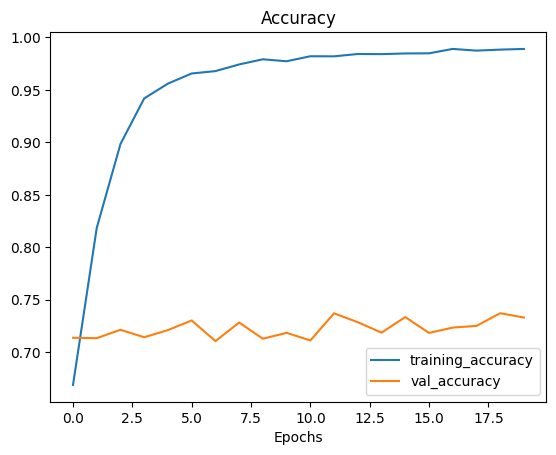

In [38]:
# Plot the validation and training data separately
plot_loss_curves(hist2)

Now let's try a new model.

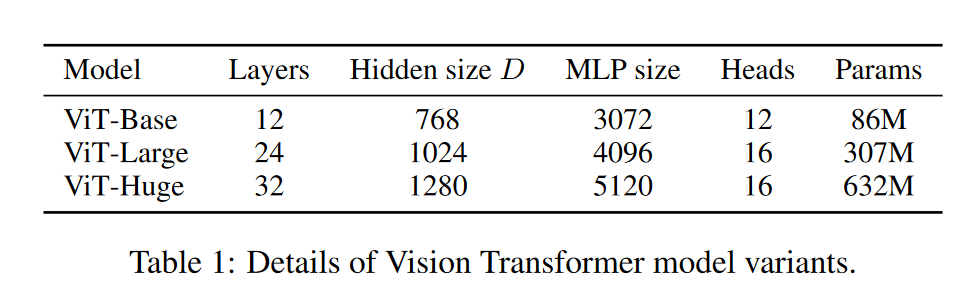



In [39]:
# All configurations are based on a ViT model with 8 layers, D = 1024,
# DM LP = 2048 and a patch size of 32, the intersection of all lines.

learning_rate = 0.001
weight_decay = 0.0001
batch_size = 256
num_epochs = 100
image_size = 72  # We'll resize input images to this size
patch_size = 6  # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 8
mlp_head_units = [2048, 1024]  # Size of the dense layers of the final classifier


In [40]:
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(image_size, image_size),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation",
)
# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(x_train)


In [41]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

In [42]:
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super().__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches


In [43]:
num_classes = 100
input_shape = (32, 32, 3)

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data()

print(f"x_train shape: {x_train.shape} - y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape} - y_test shape: {y_test.shape}")


x_train shape: (50000, 32, 32, 3) - y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3) - y_test shape: (10000, 1)


Image size: 72 X 72
Patch size: 6 X 6
Patches per image: 144
Elements per patch: 108


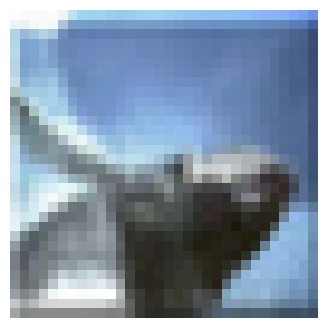

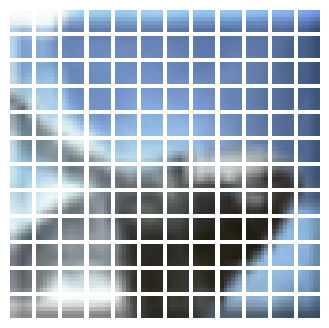

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
image = x_train[np.random.choice(range(x_train.shape[0]))]
plt.imshow(image.astype("uint8"))
plt.axis("off")

resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size=(image_size, image_size)
)
patches = Patches(patch_size)(resized_image)
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(patch_img.numpy().astype("uint8"))
    plt.axis("off")


In [45]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super().__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded


In [46]:
def create_vit_classifier():
    inputs = layers.Input(shape=input_shape)
    # Augment data.
    augmented = data_augmentation(inputs)
    # Create patches.
    patches = Patches(patch_size)(augmented)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    # Classify outputs.
    logits = layers.Dense(num_classes)(features)
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    return model


In [47]:
def run_experiment(model):
    optimizer = tf.keras.optimizers.experimental.Adam(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
        ],
    )

    checkpoint_filepath = "/tmp/checkpoint"
    checkpoint_callback = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )

    history = model.fit(
        x=x_train,
        y=y_train,
        batch_size=batch_size,
        epochs=num_epochs,
        validation_split=0.1,
        callbacks=[checkpoint_callback],
    )

    model.load_weights(checkpoint_filepath)
    _, accuracy, top_5_accuracy = model.evaluate(x_test, y_test)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")

    return history


vit_classifier = create_vit_classifier()
history = run_experiment(vit_classifier)

toner()

Epoch 1/100
176/176 [==============================] - 100s 397ms/step - loss: 4.6771 - accuracy: 0.0222 - top-5-accuracy: 0.0945 - val_loss: 4.3561 - val_accuracy: 0.0364 - val_top-5-accuracy: 0.1494
Epoch 2/100
176/176 [==============================] - 67s 378ms/step - loss: 4.3972 - accuracy: 0.0299 - top-5-accuracy: 0.1280 - val_loss: 4.2876 - val_accuracy: 0.0458 - val_top-5-accuracy: 0.1760
Epoch 3/100
176/176 [==============================] - 67s 380ms/step - loss: 4.2958 - accuracy: 0.0426 - top-5-accuracy: 0.1656 - val_loss: 4.1509 - val_accuracy: 0.0702 - val_top-5-accuracy: 0.2358
Epoch 4/100
176/176 [==============================] - 67s 381ms/step - loss: 4.1905 - accuracy: 0.0522 - top-5-accuracy: 0.2009 - val_loss: 4.0343 - val_accuracy: 0.0836 - val_top-5-accuracy: 0.2682
Epoch 5/100
176/176 [==============================] - 67s 381ms/step - loss: 4.1006 - accuracy: 0.0625 - top-5-accuracy: 0.2280 - val_loss: 3.9788 - val_accuracy: 0.0936 - val_top-5-accuracy: 0.2930

In [48]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

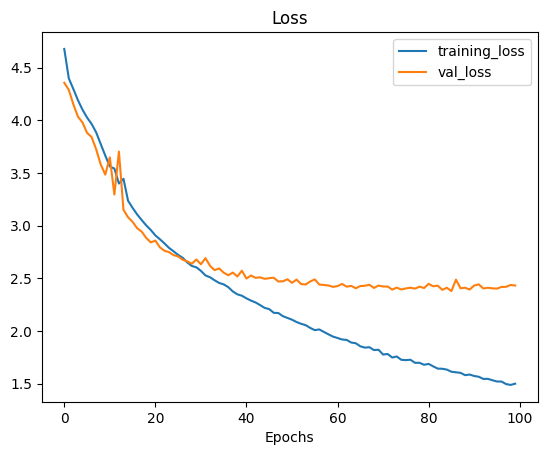

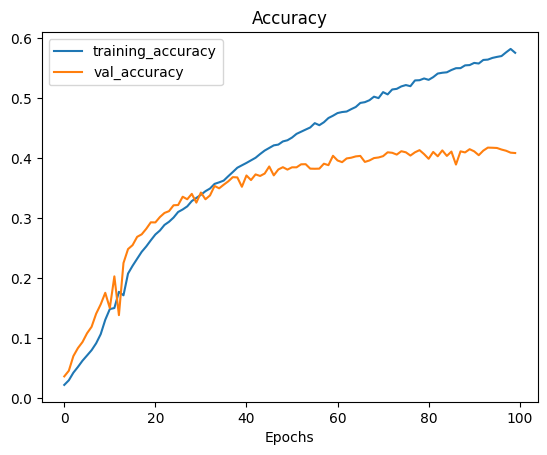

In [49]:
plot_loss_curves(history)

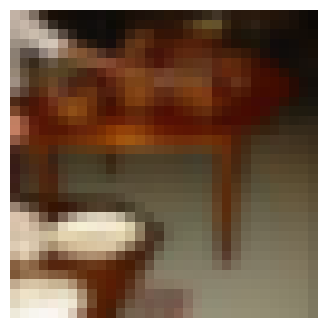

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
image = x_test[np.random.choice(range(x_test.shape[0]))]
plt.imshow(image.astype("uint8"))
plt.axis("off")
plt.show();

In [51]:
image.shape

(32, 32, 3)

In [52]:
# Why this error has occured, Is because of the differnt shapes.
pred = model.predict(image)
pred

ValueError: ignored

In [53]:
# Make a prediction
image = tf.expand_dims(image, axis=0)
image.shape

TensorShape([1, 32, 32, 3])

In [54]:
pred = model.predict(image)

1/1 [==============================] - 0s 100ms/step


Start from the last epochs of the last model training.

In [55]:
epochs = range(len(history.history['loss']))
epochs

range(0, 100)

In [56]:
learning_rate = 0.001
weight_decay = 0.0001
batch_size = 256

# Start from the last epochs, in order not to repeat comuptations.
epochs = range(len(history.history['loss']))

fine_tune_epochs = range(len(history.history['loss']))[-1] + 101

# fine_tune_epochs = fine_tune_epochs + 51

image_size = 72  # We'll resize input images to this size
patch_size = 6  # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 8
mlp_head_units = [2048, 1024]  # Size of the dense layers of the final classifier

In [58]:
def run_experiment(model):
    optimizer = tf.keras.optimizers.experimental.Adam(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
        ],
    )

    checkpoint_filepath = "/tmp/checkpoint"
    checkpoint_callback = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )

    history1 = model.fit(
        x=x_train,
        y=y_train,
        # set the add of the new number of epochs.
        epochs=fine_tune_epochs,

        batch_size=batch_size,
        # the initial epochs set to ephochs[-1], to start fromt the last epochs of last computational process.
        initial_epoch=epochs[-1],
        validation_split=0.1,
        callbacks=[checkpoint_callback],
    )

    model.load_weights(checkpoint_filepath)
    _, accuracy, top_5_accuracy = model.evaluate(x_test, y_test)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")

    return history


vit_classifier = create_vit_classifier()
history1 = run_experiment(vit_classifier)

toner()


Epoch 100/200
176/176 [==============================] - 103s 400ms/step - loss: 4.6860 - accuracy: 0.0208 - top-5-accuracy: 0.0950 - val_loss: 4.3605 - val_accuracy: 0.0404 - val_top-5-accuracy: 0.1610
Epoch 101/200
176/176 [==============================] - 68s 385ms/step - loss: 4.3797 - accuracy: 0.0315 - top-5-accuracy: 0.1378 - val_loss: 4.2000 - val_accuracy: 0.0634 - val_top-5-accuracy: 0.2220
Epoch 102/200
176/176 [==============================] - 71s 406ms/step - loss: 4.2707 - accuracy: 0.0431 - top-5-accuracy: 0.1730 - val_loss: 4.0904 - val_accuracy: 0.0718 - val_top-5-accuracy: 0.2536
Epoch 103/200
176/176 [==============================] - 67s 383ms/step - loss: 4.1853 - accuracy: 0.0508 - top-5-accuracy: 0.2005 - val_loss: 4.0381 - val_accuracy: 0.0896 - val_top-5-accuracy: 0.2778
Epoch 104/200
176/176 [==============================] - 67s 381ms/step - loss: 4.1031 - accuracy: 0.0626 - top-5-accuracy: 0.2291 - val_loss: 3.9376 - val_accuracy: 0.0966 - val_top-5-accura

In [59]:
def compare_historys(original_history, new_history, initial_epochs=50):
    """
    Compares two TensorFlow model History objects.

    Args:
      original_history: History object from original model (before new_history)
      new_history: History object from continued model training (after original_history)
      initial_epochs: Number of epochs in original_history (new_history plot starts from here)
    """

    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

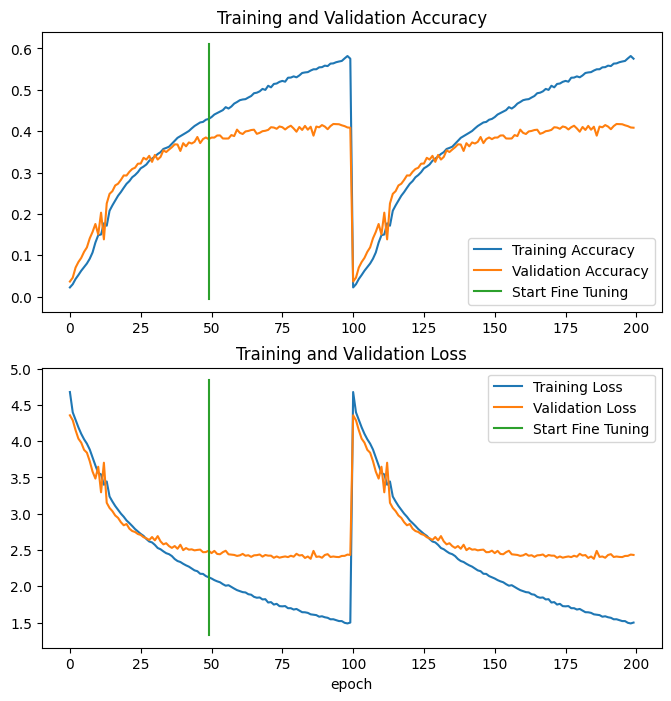

In [60]:
compare_historys(history, history1, initial_epochs=50)

In [ ]:
# Easiest way to download kaggle data in Google Colab

# Please follow the steps below to download and use kaggle data within Google Colab:

#1. Go to your account, Scroll to API section and Click Expire API Token to remove previous tokens

# 2. Click on Create New API Token - It will download kaggle.json file on your machine.

# 3. Go to your Google Colab project file and run the following commands:

# 1) ! pip install -q kaggle

# 2) from google.colab import files

# files.upload()

#     Choose the kaggle.json file that you downloaded

# 3) ! mkdir ~/.kaggle

# ! cp kaggle.json ~/.kaggle/

#     Make directory named kaggle and copy kaggle.json file there.

# 4) ! chmod 600 ~/.kaggle/kaggle.json

#     Change the permissions of the file.

# 5) ! kaggle datasets list
# - That's all ! You can check if everything's okay by running this command.
# Download Data

# ! kaggle competitions download -c 'name-of-competition'

# Use unzip command to unzip the data:

# For example,

# Create a directory named train,

# ! mkdir train

# unzip train data there,

# ! unzip train.zip -d train

In [62]:
# Mount your Google Drive files Following code make mount your google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [63]:
!pip install -q kaggle

from google.colab import files

# Download your kaggle API key (.json file). You can do this\
# by going to your kaggle account page and clicking 'Create new API token' under the API section.

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"falahfakhri","key":"2905d43e84f046a1aa570044ccbb5658"}'}

In [65]:
#Choose the kaggle.json file that you downloaded

!mkdir ~/.kaggle

!cp kaggle.json ~/.kaggle/

In [66]:
# Make directory named kaggle and copy kaggle.json file there.

!chmod 600 ~/.kaggle/kaggle.json

In [67]:
# Change the permissions of the file.

# ! kaggle datasets list
# That's all ! You can check if everything's okay by running this command.
# Download Data

!kaggle datasets download -d olgabelitskaya/horse-breeds



 99% 81.0M/82.0M [00:01<00:00, 85.6MB/s]
100% 82.0M/82.0M [00:01<00:00, 47.9MB/s]


In [68]:
# Use unzip command to unzip the data:
# !unzip horse-breeds.zip
# For example,

# Create a directory named train,

! mkdir train

# unzip train data there,

! unzip horse-breeds -d train

Archive:  horse-breeds.zip
  inflating: train/01_001.png        
  inflating: train/01_002.png        
  inflating: train/01_003.png        
  inflating: train/01_004.png        
  inflating: train/01_005.png        
  inflating: train/01_006.png        
  inflating: train/01_007.png        
  inflating: train/01_008.png        
  inflating: train/01_009.png        
  inflating: train/01_010.png        
  inflating: train/01_011.png        
  inflating: train/01_012.png        
  inflating: train/01_013.png        
  inflating: train/01_014.png        
  inflating: train/01_015.png        
  inflating: train/01_016.png        
  inflating: train/01_017.png        
  inflating: train/01_018.png        
  inflating: train/01_019.png        
  inflating: train/01_020.png        
  inflating: train/01_021.png        
  inflating: train/01_022.png        
  inflating: train/01_023.png        
  inflating: train/01_024.png        
  inflating: train/01_025.png        
  inflating: train/01_0

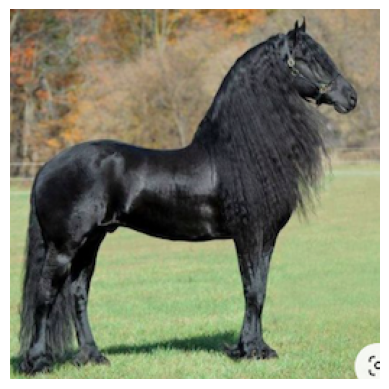

In [72]:
# View our example image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# !wget https://storage.googleapis.com/kagglesdsdata/datasets/32677/42529/data/horses/horse-10.jpg
horse = mpimg.imread("train/07_058.png")
plt.imshow(horse)
plt.axis(False);

In [74]:
horse.shape

(256, 256, 4)

In [76]:
print(horse[:,:,:3].shape)
horse = horse[:,:,:3]

(256, 256, 3)


In [77]:
horse_resized = tf.image.resize(
    horse,
    (32, 32),
    method='bilinear',
    preserve_aspect_ratio=False,
    antialias=False,
    name=None
)

In [84]:
horse_resized.shape

TensorShape([1, 32, 32, 3])

In [83]:
horse_resized = tf.expand_dims(horse_resized, axis=0)

In [85]:
horse_resized.shape

TensorShape([1, 32, 32, 3])

In [88]:
pred = model.predict(horse_resized)
pred

1/1 [==============================] - 0s 60ms/step


array([[2.41519356e-05, 1.19363605e-04, 7.41259602e-04, 2.01908778e-02,
        2.95485687e-02, 1.50222360e-04, 1.43293943e-02, 6.80515096e-02,
        5.58429724e-03, 3.32550728e-04, 6.69525994e-04, 3.14381672e-04,
        3.97415977e-04, 1.11428834e-03, 1.54994264e-01, 8.10270291e-03,
        8.11131962e-04, 1.44941456e-04, 2.45792214e-02, 2.18918175e-02,
        2.00750655e-05, 1.69254225e-02, 1.16229395e-03, 6.57108274e-07,
        3.14124417e-03, 9.01106454e-04, 8.12976435e-03, 1.36605641e-02,
        6.40438811e-04, 3.03244521e-03, 1.99008879e-04, 6.85442751e-03,
        3.54053103e-04, 5.15035074e-03, 9.94817703e-04, 5.04608906e-04,
        1.10846222e-05, 3.64830345e-03, 4.91665397e-03, 8.35618377e-03,
        4.90494363e-04, 7.06307543e-03, 2.05355696e-03, 2.02319483e-04,
        1.15032224e-02, 2.17728075e-02, 2.25155047e-04, 3.75263221e-06,
        1.19092911e-02, 7.71853138e-06, 6.59072958e-03, 9.18054022e-04,
        3.80394740e-05, 3.41085297e-06, 2.98495666e-04, 3.321883

176/176 [==============================] - 71s 402ms/step - loss: 2.9469 - accuracy: 0.2670 - top-5-accuracy: 0.5686 - val_loss: 2.7149 - val_accuracy: 0.3112 - val_top-5-accuracy: 0.6250

In [ ]:
# horse_res_reshaped = tf.reshape(
#     horse_resized, (1, 4, 768) , name=None
# )

In [ ]:
# horse_res_reshaped.shape

TensorShape([1, 4, 768])

In [ ]:
pred = model.predict(horse_resized)
pred

1/1 [==============================] - 0s 361ms/step


array([[3.54175285e-08, 1.77673050e-04, 2.24788346e-06, 2.33801533e-04,
        2.83709890e-03, 4.51835476e-05, 8.25595669e-03, 2.02398212e-03,
        1.38001367e-02, 1.66020385e-07, 4.87213583e-06, 4.57151430e-07,
        3.29844479e-04, 2.29542423e-02, 2.96901935e-03, 3.25542036e-03,
        1.16446836e-06, 3.22426931e-05, 4.88263462e-03, 6.58392720e-03,
        1.44166079e-05, 2.03656811e-07, 5.14684302e-07, 4.70478045e-10,
        1.67395792e-05, 1.53996836e-04, 2.13238671e-02, 6.35122228e-03,
        3.83050092e-10, 3.65841924e-03, 1.13339219e-07, 3.38369253e-04,
        3.64704538e-05, 1.71761401e-03, 1.13374367e-03, 5.99153509e-07,
        1.17507295e-06, 1.50482170e-02, 5.23580238e-04, 5.10957907e-04,
        5.01402901e-08, 3.80098034e-04, 5.35634754e-04, 7.44942154e-05,
        6.51403004e-03, 3.43630388e-02, 1.38967863e-07, 1.89581897e-05,
        2.95891557e-02, 7.53694849e-08, 9.15883866e-05, 2.96451239e-04,
        8.65048351e-05, 6.04222214e-06, 4.89649710e-06, 3.364017